In [7]:
function bit_reversing( n :: Int64 ) :: Float64
    
    k = 25        :: Int64
    miroir = 0.0  :: Float64
    deci = n      :: Int64
    
    @assert deci < typemax(Int64)
    while (k >= 0)
       div = 2^k
       if (deci÷div == 1)
          miroir += 2.0^(-k-1)
          deci = deci - div
       end
       k = k-1
    end
    
    miroir

end

bit_reversing (generic function with 1 method)

In [8]:
[bit_reversing(k) for k in 0:10]

11-element Array{Float64,1}:
 0.0   
 0.5   
 0.25  
 0.75  
 0.125 
 0.625 
 0.375 
 0.875 
 0.0625
 0.5625
 0.3125

In [9]:
using Sobol

In [10]:
?Sobol.SobolSeq

No documentation found.

`Sobol.SobolSeq` is of type `UnionAll`.

# Summary

```
struct UnionAll <: Type{T}
```

# Fields

```
var  :: TypeVar
body :: Any
```

# Supertype Hierarchy

```
UnionAll <: Type{T} <: Any
```


In [11]:
s = SobolSeq(1)

1-dimensional Sobol sequence on [0,1]^1

In [12]:
[next!(s) for k = 0:10]

11-element Array{Array{Float64,1},1}:
 [0.5]   
 [0.75]  
 [0.25]  
 [0.375] 
 [0.875] 
 [0.625] 
 [0.125] 
 [0.1875]
 [0.6875]
 [0.9375]
 [0.4375]

In [14]:
function trinary_reversing( n :: Int64 ) :: Float64

    k = 16 :: Int64
    miroir = 0.0 :: Float64
    deci = n :: Int64
    
    @assert deci < typemax(Int64)
     
    while (k >= 0)
       div = 3^k
       if (deci÷div == 1)
          miroir += 3.0^(-k-1)
          deci = deci - div
       elseif (deci÷div == 2)
          miroir += 2 * 3.0^(-k-1)
          deci = deci - 2 * div
       end
       k = k-1
    end

    
    miroir

end

trinary_reversing (generic function with 1 method)

In [15]:
[trinary_reversing(k) for k in 1:10]

10-element Array{Float64,1}:
 0.3333333333333333  
 0.6666666666666666  
 0.1111111111111111  
 0.4444444444444444  
 0.7777777777777777  
 0.2222222222222222  
 0.5555555555555556  
 0.8888888888888888  
 0.037037037037037035
 0.37037037037037035 

In [16]:
function penta_reversing( n :: Int64 ) :: Float64

    k = 11 :: Int64
    miroir = 0.0 :: Float64
    deci = n :: Int64
    
    @assert deci < typemax(Int64)
    while (k >= 0)
       div = 5^k
       if (deci÷div == 1) 
          miroir +=  5.0^(-k-1)
          deci = deci - div
       elseif (deci÷div == 2) 
          miroir +=  2 * 5.0^(-k-1)
          deci = deci - 2 * div
       elseif (deci÷div == 3) 
          miroir +=  3.0^(-k-1)
          deci = deci - 3 * div
       elseif (deci÷div == 4) 
          miroir += 4 * 5.0^(-k-1)
          deci = deci - 4 * div
       end
       k = k-1
    end
    
    miroir

end

penta_reversing (generic function with 1 method)

In [17]:
[penta_reversing(k) for k in 1:10]

10-element Array{Float64,1}:
 0.2                
 0.4                
 0.3333333333333333 
 0.8                
 0.04               
 0.24000000000000002
 0.44               
 0.3733333333333333 
 0.8400000000000001 
 0.08               

In [117]:
"""
Solve D(x) = R
"""
function dichotomie(R)
    
    kx, alpha = 0.5, 0.1
    eps = 1e-12
    a, b = 0, 2π/kx
    while true
        x = 0.5 * (a+b)
        D = ( kx * x + alpha * sin(kx*x)) / 2π
        if ( D<R-eps )
           a = x
        elseif ( D>R+eps )
           b = x
        else
           return x
        end
    end
end

dichotomie

In [118]:
dichotomie(0.9)

11.418335561725414

In [136]:
function plasma( nbpart :: Int64)
    
   xp = Float64[]
   vp = Float64[]

   for k=0:nbpart-1

      v = sqrt(-2 * log( (k+0.5)/nbpart))
      θ = trinary_reversing( k ) * 2π
      push!(xp,  dichotomie(bit_reversing( k )))
      push!(vp,  v * sin(θ))

   end

   xp, vp
    
end

plasma (generic function with 1 method)

In [137]:
xp, vp = plasma(10000)

([5.71452e-12, 6.28319, 2.94258, 9.62379, 1.43899, 8.00572, 4.56066, 11.1274, 0.715376, 7.15283  …  4.60746, 11.168, 0.755363, 7.20089, 3.78084, 10.4292, 2.22074, 8.87561, 5.46164, 11.891], [0.0, 3.63419, -3.52719, 2.56432, 1.34273, -3.81557, 3.77286, -1.29746, -2.41713, 0.860358  …  0.00430746, 0.0335028, -0.0352967, 0.0257956, 0.00821006, -0.0288883, 0.0263843, -0.00968692, -0.00976845, 0.00325625])

In [138]:
using Plots


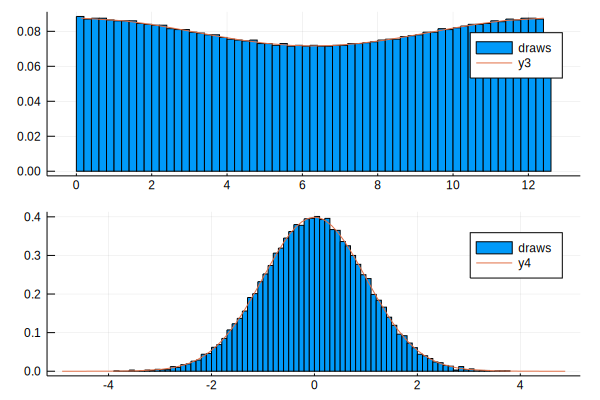

In [139]:
p = Plots.histogram([xp, vp], normalize=true, bins = 100,  layout=(2,1), lab = "draws")
plot!(p[1,1], x-> (1+0.1*cos(0.5*x))/4π, 0., 4π)
plot!(p[2,1], x-> (exp(-x^2/2))/sqrt(2π), -5, 5)